<a href="https://colab.research.google.com/github/adhikesavan-analytics/EV_Analysis_DA/blob/main/Copy_of_Untitled32.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd

df = pd.read_csv("Electric_Vehicle_Population_Data.csv")
df.head()


,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE8L,Thurston,Tumwater,WA,98501.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291.0,35.0,124633715.0,POINT (-122.89165 47.03954),PUGET SOUND ENERGY INC,5.306701e+10
1,5YJXCAE2XJ,Snohomish,Bothell,WA,98021.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238.0,1.0,474826075.0,POINT (-122.18384 47.8031),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJ3E1EBXK,King,Kent,WA,98031.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,47.0,280307233.0,POINT (-122.17743 47.41185),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
3,7SAYGDEE4T,King,Issaquah,WA,98027.0,2026,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,41.0,280786565.0,POINT (-122.03439 47.5301),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
4,WAUUPBFF9G,King,Seattle,WA,98103.0,2016,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,16.0,43.0,198988891.0,POINT (-122.35436 47.67596),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10


In [3]:
df.shape

(26341, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26341 entries, 0 to 26340
Data columns (total 16 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   VIN (1-10)                                         26341 non-null  object 
 1   County                                             26339 non-null  object 
 2   City                                               26339 non-null  object 
 3   State                                              26341 non-null  object 
 4   Postal Code                                        26339 non-null  float64
 5   Model Year                                         26341 non-null  int64  
 6   Make                                               26341 non-null  object 
 7   Model                                              26341 non-null  object 
 8   Electric Vehicle Type                              26341 non-null  object 
 9   Clean 

In [5]:
df.isnull().sum()

,0
VIN (1-10),0
County,2
City,2
State,0
Postal Code,2
Model Year,0
Make,0
Model,0
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0


In [9]:
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Legislative District', 'DOL Vehicle ID', 'Vehicle Location',
       'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [10]:
(df["Electric Range"]==0).sum()

np.int64(16227)

In [11]:
import numpy as np
df["Electric Range"] = df["Electric Range"].replace(0, np.nan)

In [12]:
df["Electric Range"].isnull().sum()

np.int64(16228)

In [13]:
categorical_cols = [
    "County", "City", "Postal Code",
    "Vehicle Location", "Electric Utility",
    "Legislative District", "2020 Census Tract"
]

df[categorical_cols] = df[categorical_cols].fillna("Unknown")


In [14]:
df.isnull().sum()


,0
VIN (1-10),0
County,0
City,0
State,0
Postal Code,0
Model Year,0
Make,0
Model,0
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0


In [15]:
df.duplicated().sum()

np.int64(0)

In [6]:
df["VIN_Anonymized"] = df["VIN (1-10)"].str[-4:]


In [7]:
df[["VIN (1-10)", "VIN_Anonymized"]].head()


,VIN (1-10),VIN_Anonymized
0,5YJYGDEE8L,EE8L
1,5YJXCAE2XJ,E2XJ
2,5YJ3E1EBXK,EBXK
3,7SAYGDEE4T,EE4T
4,WAUUPBFF9G,FF9G


In [8]:
df["Vehicle Location"].head()


,Vehicle Location
0,POINT (-122.89165 47.03954)
1,POINT (-122.18384 47.8031)
2,POINT (-122.17743 47.41185)
3,POINT (-122.03439 47.5301)
4,POINT (-122.35436 47.67596)


In [9]:
df["Longitude"] = df["Vehicle Location"].str.extract(r'POINT \(([-\d.]+)')
df["Latitude"] = df["Vehicle Location"].str.extract(r' ([-\d.]+)\)')


In [10]:
df[["Vehicle Location", "Longitude", "Latitude"]].head()


,Vehicle Location,Longitude,Latitude
0,POINT (-122.89165 47.03954),-122.89165,47.03954
1,POINT (-122.18384 47.8031),-122.18384,47.8031
2,POINT (-122.17743 47.41185),-122.17743,47.41185
3,POINT (-122.03439 47.5301),-122.03439,47.5301
4,POINT (-122.35436 47.67596),-122.35436,47.67596


In [11]:
df.isnull().sum()


,0
VIN (1-10),0
County,2
City,2
State,0
Postal Code,2
Model Year,0
Make,0
Model,0
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0


In [12]:
df["Make"].value_counts().head(5)


,count
Make,
TESLA,1830
NISSAN,330
CHEVROLET,287
BMW,223
KIA,220


In [13]:
df["Model"].value_counts().head(5)


,count
Model,
MODEL Y,880
MODEL 3,657
LEAF,299
MODEL S,153
WRANGLER,146


In [14]:
df["County"].value_counts().head(10)


,count
County,
King,2788
Snohomish,438
Clark,382
Kitsap,274
Thurston,214
Yakima,98
Cowlitz,37
Skagit,37
Island,32


In [15]:
df["Model Year"].value_counts().sort_index()


,count
Model Year,
2011,14
2012,29
2013,78
2014,66
2015,107
2016,104
2017,164
2018,285
2019,226


In [16]:
df["Electric Range"].mean()


np.float64(52.57075682937752)

In [17]:
df["Clean Alternative Fuel Vehicle (CAFV) Eligibility"].value_counts()


,count
Clean Alternative Fuel Vehicle (CAFV) Eligibility,
Eligibility unknown as battery range has not been researched,2440
Clean Alternative Fuel Vehicle Eligible,1524
Not eligible due to low battery range,502
El,1


In [18]:
df["Clean Alternative Fuel Vehicle (CAFV) Eligibility"].value_counts(normalize=True) * 100


,proportion
Clean Alternative Fuel Vehicle (CAFV) Eligibility,
Eligibility unknown as battery range has not been researched,54.622789
Clean Alternative Fuel Vehicle Eligible,34.116857
Not eligible due to low battery range,11.237967
El,0.022386


In [19]:
df.groupby("Make")["Electric Range"].mean().sort_values(ascending=False).head(10)


,Electric Range
Make,
JAGUAR,187.200000
CHEVROLET,94.554007
NISSAN,76.209091
TESLA,73.099508
FIAT,71.880000
SMART,64.666667
LAND ROVER,48.750000
PORSCHE,48.285714
KIA,44.359091


In [20]:
df.groupby("Model")["Electric Range"].mean().sort_values(ascending=False).head(10)


,Electric Range
Model,
MODEL S,187.980392
I-PACE,187.200000
BOLT EV,177.423077
E-TRON,137.100000
MODEL X,133.132743
MODEL 3,114.853659
E-TRON SPORTBACK,109.000000
E-GOLF,104.000000
RAV4,103.000000


In [21]:
df.groupby("Model Year")["Electric Range"].mean().sort_index()


,Electric Range
Model Year,
2011,73.000000
2012,56.827586
2013,81.474359
2014,87.121212
2015,102.710280
2016,101.221154
2017,120.182927
2018,165.642105
2019,184.500000


In [22]:
df["County"].value_counts().head(5)


,count
County,
King,2788
Snohomish,438
Clark,382
Kitsap,274
Thurston,214


In [23]:
df["County"].value_counts().tail(5)


,count
County,
Okanogan,2
Mason,1
Ferry,1
Montgomery,1
El Paso,1


In [24]:
top_makes = df["Make"].value_counts().head(5)
top_makes


,count
Make,
TESLA,1830
NISSAN,330
CHEVROLET,287
BMW,223
KIA,220


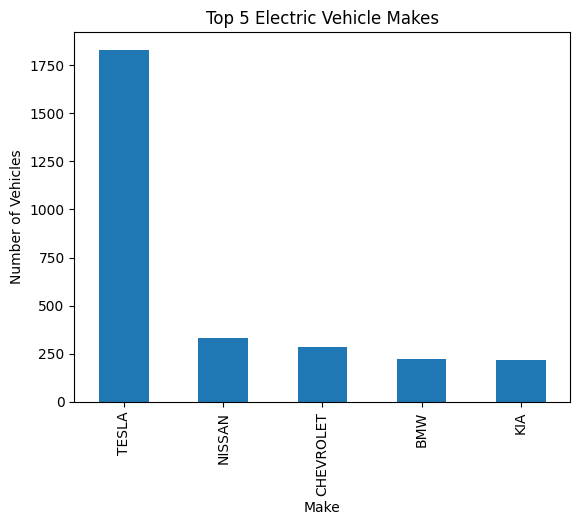

In [25]:
import matplotlib.pyplot as plt

top_makes.plot(kind="bar")
plt.title("Top 5 Electric Vehicle Makes")
plt.xlabel("Make")
plt.ylabel("Number of Vehicles")
plt.show()

In [26]:
ev_by_year = df["Model Year"].value_counts().sort_index()
ev_by_year


,count
Model Year,
2011,14
2012,29
2013,78
2014,66
2015,107
2016,104
2017,164
2018,285
2019,226


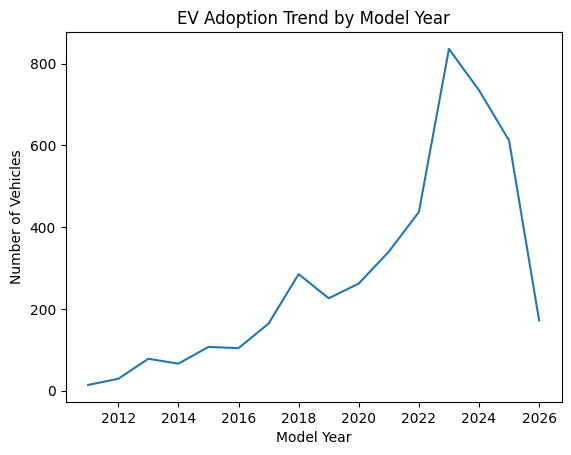

In [27]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(ev_by_year.index, ev_by_year.values)
plt.title("EV Adoption Trend by Model Year")
plt.xlabel("Model Year")
plt.ylabel("Number of Vehicles")
plt.show()


In [28]:
ev_by_year = df["Model Year"].value_counts().sort_index()
ev_by_year


,count
Model Year,
2011,14
2012,29
2013,78
2014,66
2015,107
2016,104
2017,164
2018,285
2019,226


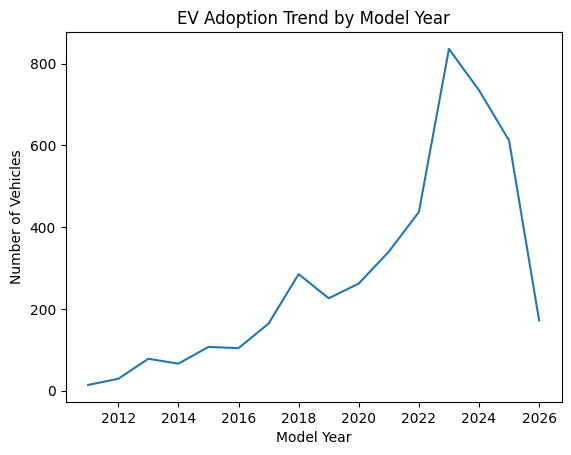

In [29]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(ev_by_year.index, ev_by_year.values)
plt.title("EV Adoption Trend by Model Year")
plt.xlabel("Model Year")
plt.ylabel("Number of Vehicles")
plt.show()


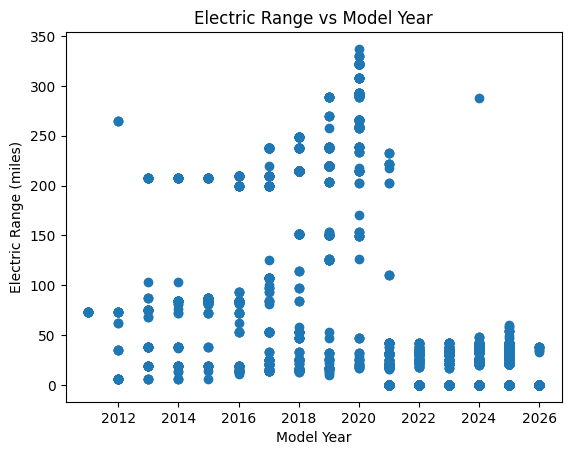

In [30]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(df["Model Year"], df["Electric Range"])
plt.title("Electric Range vs Model Year")
plt.xlabel("Model Year")
plt.ylabel("Electric Range (miles)")
plt.show()


In [31]:
cafv_counts = df["Clean Alternative Fuel Vehicle (CAFV) Eligibility"].value_counts()
cafv_counts


,count
Clean Alternative Fuel Vehicle (CAFV) Eligibility,
Eligibility unknown as battery range has not been researched,2440
Clean Alternative Fuel Vehicle Eligible,1524
Not eligible due to low battery range,502
El,1


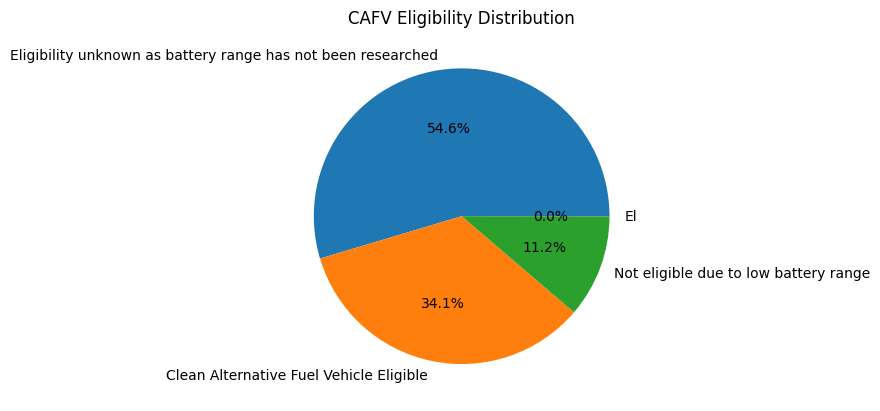

In [32]:
import matplotlib.pyplot as plt

plt.figure()
plt.pie(cafv_counts.values, labels=cafv_counts.index, autopct="%1.1f%%")
plt.title("CAFV Eligibility Distribution")
plt.show()


In [33]:
df["Latitude"] = pd.to_numeric(df["Latitude"], errors="coerce")
df["Longitude"] = pd.to_numeric(df["Longitude"], errors="coerce")


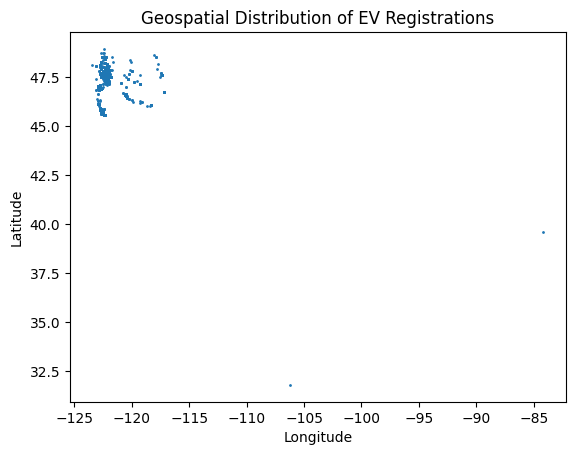

In [34]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(df["Longitude"], df["Latitude"], s=1)
plt.title("Geospatial Distribution of EV Registrations")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()
